In [1]:
library(httr)

base_url <- 'http://nflarrest.com/api/v1/'
crimes_url <- paste0(base_url, 'crime')

In [2]:
parse_url(crimes_url)

$scheme
[1] "http"

$hostname
[1] "nflarrest.com"

$port
NULL

$path
[1] "api/v1/crime"

$query
NULL

$params
NULL

$fragment
NULL

$username
NULL

$password
NULL

attr(,"class")
[1] "url"

In [3]:
response <- GET(crimes_url, verbose())

In [4]:
response$status_code

[1] 200

In [5]:
response$headers$`content-type`

[1] "application/json"

In [6]:
response

Response [http://nflarrest.com/api/v1/crime]
  Date: 2017-06-20 20:54
  Status: 200
  Content-Type: application/json
  Size: 5.03 kB


In [7]:
names(response)

[1] "url"         "status_code" "headers"     "all_headers" "cookies"    
 [6] "content"     "date"        "times"       "request"     "handle"

In [8]:
the_content <- content(response, "text", encoding = "UTF-8")

In [9]:
typeof(the_content)

[1] "character"

In [10]:
the_content

[1] "[{\"Category\":\"DUI\",\"arrest_count\":\"186\"},{\"Category\":\"Drugs\",\"arrest_count\":\"93\"},{\"Category\":\"Domestic violence\",\"arrest_count\":\"84\"},{\"Category\":\"Assault\",\"arrest_count\":\"63\"},{\"Category\":\"Disorderly conduct\",\"arrest_count\":\"38\"},{\"Category\":\"Gun\",\"arrest_count\":\"25\"},{\"Category\":\"License\",\"arrest_count\":\"17\"},{\"Category\":\"Reckless driving\",\"arrest_count\":\"15\"},{\"Category\":\"Alcohol\",\"arrest_count\":\"14\"},{\"Category\":\"Resisting arrest\",\"arrest_count\":\"14\"},{\"Category\":\"Battery\",\"arrest_count\":\"14\"},{\"Category\":\"Theft\",\"arrest_count\":\"14\"},{\"Category\":\"Public intoxication\",\"arrest_count\":\"14\"},{\"Category\":\"DUI, drugs\",\"arrest_count\":\"10\"},{\"Category\":\"Outstanding warrant\",\"arrest_count\":\"8\"},{\"Category\":\"Assault, gun\",\"arrest_count\":\"6\"},{\"Category\":\"Drugs, gun\",\"arrest_count\":\"6\"},{\"Category\":\"Failure to appear\",\"arrest_count\":\"6\"},{\"Category\":\"Trespassing\",\"arrest_count\":\"5\"},{\"Category\":\"Sex\",\"arrest_count\":\"5\"},{\"Category\":\"Obstruction\",\"arrest_count\":\"5\"},{\"Category\":\"Violating court order\",\"arrest_count\":\"5\"},{\"Category\":\"Gun, drugs\",\"arrest_count\":\"4\"},{\"Category\":\"Sexual assault\",\"arrest_count\":\"4\"},{\"Category\":\"Disorderly conduct, sex\",\"arrest_count\":\"4\"},{\"Category\":\"Animal abuse\",\"arrest_count\":\"3\"},{\"Category\":\"Solicitation\",\"arrest_count\":\"3\"},{\"Category\":\"Probation violation\",\"arrest_count\":\"3\"},{\"Category\":\"DUI, gun\",\"arrest_count\":\"2\"},{\"Category\":\"Harassment\",\"arrest_count\":\"2\"},{\"Category\":\"Assault, alcohol\",\"arrest_count\":\"2\"},{\"Category\":\"Manslaughter\",\"arrest_count\":\"2\"},{\"Category\":\"Murder, gun\",\"arrest_count\":\"2\"},{\"Category\":\"Criminal mischief\",\"arrest_count\":\"2\"},{\"Category\":\"Disorderly conduct, alcoh\",\"arrest_count\":\"2\"},{\"Category\":\"Domestic violence, gun\",\"arrest_count\":\"2\"},{\"Category\":\"Burglary\",\"arrest_count\":\"2\"},{\"Category\":\"DUI, assault\",\"arrest_count\":\"1\"},{\"Category\":\"Sexual battery\",\"arrest_count\":\"1\"},{\"Category\":\"Reckless driving, drugs\",\"arrest_count\":\"1\"},{\"Category\":\"Domestic dispute\",\"arrest_count\":\"1\"},{\"Category\":\"Eluding police\",\"arrest_count\":\"1\"},{\"Category\":\"Alcohol, disorderly condu\",\"arrest_count\":\"1\"},{\"Category\":\"DUI, drugs, gun\",\"arrest_count\":\"1\"},{\"Category\":\"Dogfighting\",\"arrest_count\":\"1\"},{\"Category\":\"Hit-and-run\",\"arrest_count\":\"1\"},{\"Category\":\"Domestic\",\"arrest_count\":\"1\"},{\"Category\":\"Evading arrest\",\"arrest_count\":\"1\"},{\"Category\":\"Evading police\",\"arrest_count\":\"1\"},{\"Category\":\"Domestic violence, rape\",\"arrest_count\":\"1\"},{\"Category\":\"Property destruction\",\"arrest_count\":\"1\"},{\"Category\":\"Child support\",\"arrest_count\":\"1\"},{\"Category\":\"Reckless driving, weapon\",\"arrest_count\":\"1\"},{\"Category\":\"Gun, stolen possession\",\"arrest_count\":\"1\"},{\"Category\":\"Alcohol, resisting arrest\",\"arrest_count\":\"1\"},{\"Category\":\"Attempted murder\",\"arrest_count\":\"1\"},{\"Category\":\"Drugs, license\",\"arrest_count\":\"1\"},{\"Category\":\"Drugs, resisting arrest\",\"arrest_count\":\"1\"},{\"Category\":\"Traffic warrants\",\"arrest_count\":\"1\"},{\"Category\":\"Theft, gun\",\"arrest_count\":\"1\"},{\"Category\":\"Disturbing the peace\",\"arrest_count\":\"1\"},{\"Category\":\"Failure to appear, gun\",\"arrest_count\":\"1\"},{\"Category\":\"Handicap parking\",\"arrest_count\":\"1\"},{\"Category\":\"Theft, drugs\",\"arrest_count\":\"1\"},{\"Category\":\"Indecent exposure\",\"arrest_count\":\"1\"},{\"Category\":\"Traffic warrant\",\"arrest_count\":\"1\"},{\"Category\":\"Breach of peace\",\"arrest_count\":\"1\"},{\"Category\":\"Guns, drugs\",\"arrest_count\":\"1\"},{\"Category\":\"Police interference\",\"arrest_count\":\"1\"},{\"Category\":\"Bat

In [11]:
library(jsonlite)
dfCrime <- fromJSON(the_content, simplifyDataFrame =  TRUE)
head(dfCrime)

Category,arrest_count
DUI,186
Drugs,93
Domestic violence,84
Assault,63
Disorderly conduct,38
Gun,25


Let's only bring back the top 2 crimes. We can use the `modify_url` function from `httr`.

In [12]:
top2_url <- modify_url(crimes_url, query = list(limit = 2))
top2_url

response <- GET(top2_url)

# Can also do this in one shot
response <- GET(crimes_url, query = list(limit = 2))

the_content <- content(response, "text", encoding = "UTF-8")
dfCrime <- fromJSON(the_content, simplifyDataFrame =  TRUE)
head(dfCrime)

[1] "http://nflarrest.com/api/v1/crime?limit=2"

Category,arrest_count
DUI,186
Drugs,93


In [13]:
top_crime <- dfCrime$Category[1]
top_crime

[1] "DUI"

In [14]:
player_crime_url <- paste0(base_url, "crime/topPlayers/", top_crime)
response <- GET(player_crime_url)
the_content <- content(response, "text", encoding = "UTF-8")
dfPlayerDUI <- fromJSON(the_content, simplifyDataFrame =  TRUE)
head(dfPlayerDUI)

Name,arrest_count
Eric Warfield,3
Kenny Mixon,3
Eric Wright,2
D.J. Williams,2
Jermaine Haley,2
Jared Allen,2


In [15]:
suppressPackageStartupMessages(library(dplyr))

GetPlayers <- function(team, limit){
  player_url <- "http://nflarrest.com/api/v1/player/"
  
  if (!missing(limit)) {
    player_url <- modify_url(query = list(limit = limit))
  }
  response <- GET(player_url)
  the_content <- content(response, "text", encoding = "UTF-8")
  df <- fromJSON(the_content, simplifyDataFrame =  TRUE)
  
  if (!missing(team)) {
    df <- df %>% filter(Team_name == team)
  }
    
  df
}

In [16]:
dfPlayers <- GetPlayers(team = "Bengals")
head(dfPlayers)

Name,Team,Team_name,Team_city,Position,arrest_count
Chris Henry,CIN,Bengals,Cincinnati,WR,6
Adam Jones,CIN,Bengals,Cincinnati,CB,4
Cedric Benson,CIN,Bengals,Cincinnati,RB,2
A.J. Nicholson,CIN,Bengals,Cincinnati,LB,2
Rey Maualuga,CIN,Bengals,Cincinnati,LB,2
Steve Foley,CIN,Bengals,Cincinnati,LB,2


In [17]:
dfCrimesByPosition <- GetPlayers() %>% 
  group_by(Position) %>% 
  mutate(arrest_count = as.integer(arrest_count)) %>% 
  summarise(avg_arrests = mean(arrest_count)) %>% 
  arrange(desc(avg_arrests))

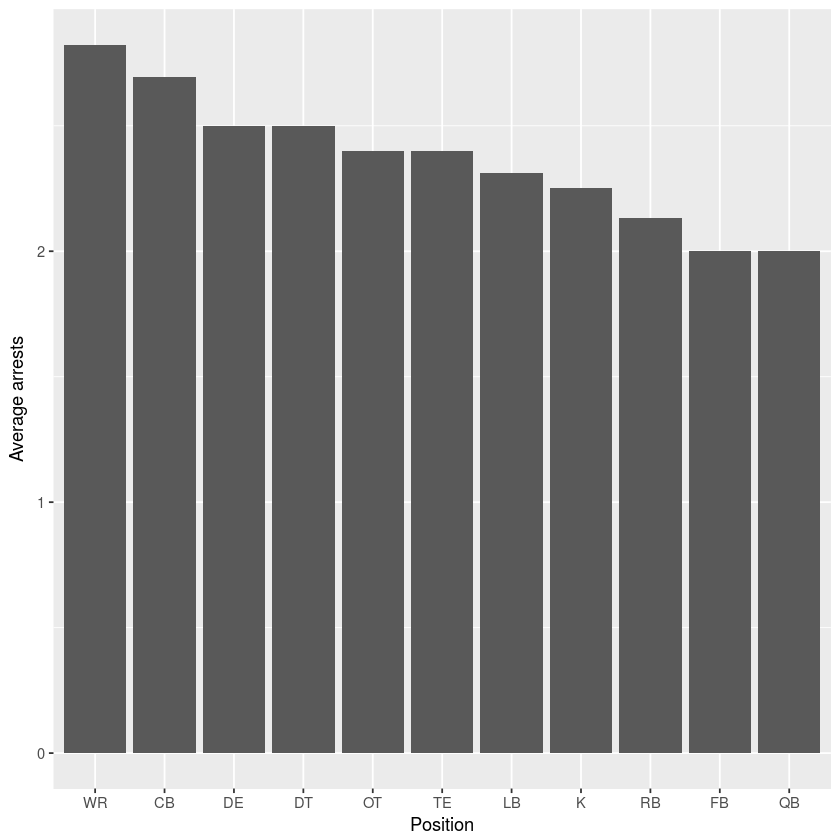

In [18]:
library(ggplot2)
reorder_size <- function(df) {
  df <- arrange(df, desc(avg_arrests))
  factor(df$Position, levels = df$Position)
}
plt <- ggplot(dfCrimesByPosition, aes(reorder_size(dfCrimesByPosition), avg_arrests)) + geom_bar(stat="identity")
plt <- plt + ggplot2::xlab("Position") + ylab("Average arrests")
plt